In [53]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\dhara\anaconda4\lib\site-packages\tensorflow\python\client\session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [54]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
tf.__version__

'2.2.0'

In [56]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [57]:
training_set = train_datagen.flow_from_directory('C:\\Users\\dhara\\OneDrive\\Desktop\\Samples\\train1',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:\\Users\\dhara\\OneDrive\\Desktop\\Samples\\test1',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 630 images belonging to 5 classes.
Found 278 images belonging to 5 classes.


In [58]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [59]:
from tensorflow.keras.regularizers import l2

In [65]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[256, 256, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

'''model1.add(Dense(4096, activation='relu'))
    model1.add(Dropout(0.5))
    model1.add(Dense(4096, activation='relu'))
    model1.add(Dropout(0.5))
    model1.add(Dense(5, activation='softmax'))'''

"model1.add(Dense(4096, activation='relu'))\n    model1.add(Dropout(0.5))\n    model1.add(Dense(4096, activation='relu'))\n    model1.add(Dropout(0.5))\n    model1.add(Dense(5, activation='softmax'))"

In [66]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [67]:
## for mulitclassification
cnn.add(Dense(5, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [68]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               4194432   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [69]:
# Part 3 - Training the CNN

# Compiling the CNN
#cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
20/20 [==============================] - 27s 1s/step - loss: 1.4342 - accuracy: 0.3143 - val_loss: 1.5088 - val_accuracy: 0.2086
Epoch 2/15
20/20 [==============================] - 31s 2s/step - loss: 1.4125 - accuracy: 0.3175 - val_loss: 1.4899 - val_accuracy: 0.2086
Epoch 3/15
20/20 [==============================] - 28s 1s/step - loss: 1.3954 - accuracy: 0.3175 - val_loss: 1.4751 - val_accuracy: 0.2086
Epoch 4/15
20/20 [==============================] - 31s 2s/step - loss: 1.3825 - accuracy: 0.3175 - val_loss: 1.4639 - val_accuracy: 0.2086
Epoch 5/15
20/20 [==============================] - 32s 2s/step - loss: 1.3726 - accuracy: 0.3175 - val_loss: 1.4554 - val_accuracy: 0.2086
Epoch 6/15
20/20 [==============================] - 32s 2s/step - loss: 1.3652 - accuracy: 0.3175 - val_loss: 1.4491 - val_accuracy: 0.2086
Epoch 7/15
20/20 [==============================] - 33s 2s/step - loss: 1.3597 - accuracy: 0.3175 - val_loss: 1.4445 - val_accuracy: 0.2086
Epoch 8/15
20/20 [==

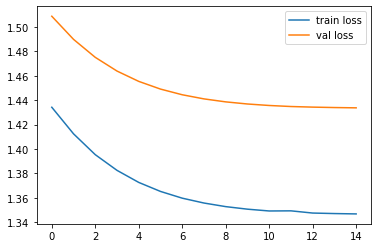

<Figure size 432x288 with 0 Axes>

In [70]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [72]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [73]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               4194432   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [33]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:\\Users\\dhara\\OneDrive\\Desktop\\Samples\\test1\\2nd Degree  AV Block Type II\\460828574-M-56-2D1.JPG", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result

array([[0.35975313, 0.14916788, 0.22020438, 0.13747941, 0.13339521]],
      dtype=float32)

In [77]:
if result[0]>0:
    print("2nd Degree  AV Block Type I")
elif result[1]>0:
    print("2nd Degree  AV Block Type II")
elif result[2]>0:
    print("Accelerated Idio ventricular Rhythm")
elif result[3]>0:
    print("Accelerated Junctional Rhyhtm")
else:
    print("Advance Heart Block")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [76]:
if result.all() < 0:
    print("tin")
else:
    print("ok")

ok
